# Sales Analysis

___

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

___

## Load data

In [2]:
path = '../data'
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files
all_sales_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_sales_data = pd.concat([all_sales_data, current_data])
    
all_sales_data.to_csv("../data/all_sales_data.csv")

In [3]:
df = pd.read_csv('../data/all_sales_data.csv')

___

## Data Preparation & Cleaning 

### Check dimensions 

In [4]:
df.shape

(1494800, 8)

In [5]:
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1164136,1164136,12642.0,307734,AAA Batteries (4-pack),1,2.99,12/07/19 12:37,"558 Main St, Los Angeles, CA 90001"
791297,791297,791297.0,308550,Macbook Pro Laptop,1,1700,12/19/19 16:47,"974 Wilson St, Seattle, WA 98101"
1480435,17700,NaN,276239,Google Phone,1,600,10/04/19 19:15,"625 South St, Dallas, TX 75001"
51967,51967,51967.0,316274,Bose SoundSport Headphones,1,99.99,12/22/19 02:44,"752 Lake St, Portland, OR 97035"
35984,35984,35984.0,300987,Lightning Charging Cable,1,14.95,12/09/19 20:41,"261 Willow St, San Francisco, CA 94016"
701234,701234,701234.0,282207,Lightning Charging Cable,2,14.95,11/11/19 19:48,"127 North St, Seattle, WA 98101"
929691,929691,929691.0,254979,Lightning Charging Cable,1,14.95,09/20/19 19:06,"292 Pine St, Austin, TX 73301"
698334,698334,698334.0,279428,USB-C Charging Cable,1,11.95,11/03/19 08:04,"999 Maple St, Los Angeles, CA 90001"
1224210,1224210,11469.0,220865,AAA Batteries (4-pack),2,2.99,06/12/19 21:42,"362 Highland St, Seattle, WA 98101"
522950,522950,522950.0,290378,Lightning Charging Cable,1,14.95,11/14/19 08:13,"727 Dogwood St, New York City, NY 10001"


### Check for nulls

In [6]:
df.isnull().any()

Unnamed: 0.1        False
Unnamed: 0           True
Order ID             True
Product              True
Quantity Ordered     True
Price Each           True
Order Date           True
Purchase Address     True
dtype: bool

#### Drop all nulls values

In [7]:
df = df.dropna()

### Check for duplicates

In [8]:
df.duplicated().any()

False

#### Drop duplicates

In [9]:
df = df.drop_duplicates()

### Check data types

In [10]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0          float64
Order ID             object
Product              object
Quantity Ordered     object
Price Each           object
Order Date           object
Purchase Address     object
dtype: object

#### Get rid of the OR in date

In [11]:
df = df[df['Order Date'].str[0:2]!='Or']

#### Change to Numeric

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

#### Change to Datetime

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                 float64
Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

___

## Data Analysis 

### 1) What was the best month for sales? How much was earned that month?

#### Add a Column for Month

In [15]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.month

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add a Column for Sales

In [17]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')

In [18]:
df.sample(10)

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
440728,440728,440728.0,161513,27in FHD Monitor,1,149.99,2019-02-20 12:55:00,"251 Pine St, Atlanta, GA 30301",2,149.99
92510,92510,92510.0,210750,AAA Batteries (4-pack),1,2.99,2019-06-24 12:44:00,"861 Lake St, New York City, NY 10001",6,2.99
848943,848943,848943.0,219356,Apple Airpods Headphones,1,150.00,2019-06-21 01:10:00,"866 Hickory St, New York City, NY 10001",6,150.00
1171414,1171414,19920.0,314698,Flatscreen TV,1,300.00,2019-12-11 20:12:00,"256 Willow St, New York City, NY 10001",12,300.00
776391,776391,776391.0,246820,Flatscreen TV,1,300.00,2019-08-13 21:41:00,"468 Sunset St, Boston, MA 02215",8,300.00
1218582,1218582,5841.0,215466,Lightning Charging Cable,1,14.95,2019-06-09 10:17:00,"282 Center St, Portland, OR 97035",6,14.95
896742,896742,896742.0,290464,Bose SoundSport Headphones,1,99.99,2019-11-19 22:15:00,"332 South St, Atlanta, GA 30301",11,99.99
2674,2674,2674.0,179119,iPhone,1,700.00,2019-04-08 14:18:00,"994 Jackson St, San Francisco, CA 94016",4,700.00
552978,552978,552978.0,252105,Wired Headphones,1,11.99,2019-09-25 17:48:00,"262 Lake St, Dallas, TX 75001",9,11.99
708978,708978,708978.0,289592,AAA Batteries (4-pack),2,2.99,2019-11-10 09:46:00,"772 Sunset St, San Francisco, CA 94016",11,5.98


In [19]:
max_sales_month = df.groupby(['Month']).sum()
max_sales_month

,Unnamed: 0.1,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,,
1,43010546712,3.147124e+10,76321,12682378.66,12755797.11
2,52146681216,3.805669e+10,94143,15322193.04,15414156.94
3,71424865344,5.284263e+10,119035,19538454.81,19649702.66
4,72913160544,5.241868e+10,143906,23573697.14,23734691.68
5,79915833487,5.935104e+10,130669,21945875.91,22068247.25
6,62528121166,4.609017e+10,106771,17934179.27,18044615.82
7,64535603601,4.740704e+10,112504,18427776.92,18534430.32
8,48981693292,3.535139e+10,94136,15612417.94,15711275.16
9,60309998378,4.524800e+10,91763,14594944.63,14682920.91


In [20]:
max_sales_month.to_csv('../results/max_sales_month.csv', encoding='utf-8')

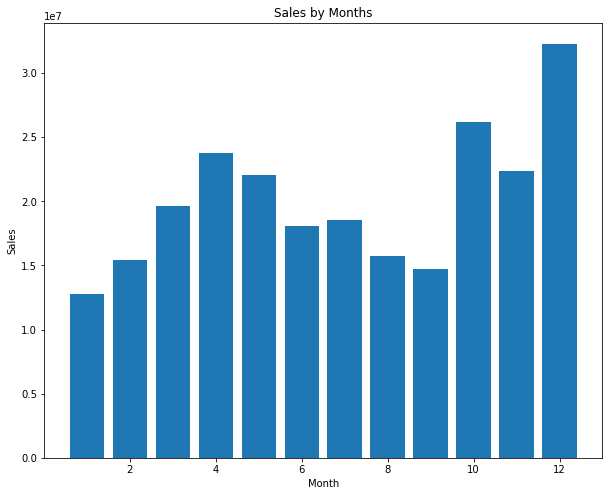

In [21]:
plt.figure(figsize=(10,8))
plt.bar(max_sales_month.index, max_sales_month['Sales'])
plt.title('Sales by Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## 2) What was the total sales amount?

In [22]:
max_sales_month['Sales'].sum()

241444251.79

## 3) What was the Best day for sales?

### Add a Column for day

In [23]:
df['DayofWeek'] = pd.to_datetime(df['Order Date']).dt.dayofweek

In [24]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1


In [25]:
sales_day = df.groupby(['DayofWeek']).sum()

In [26]:
sales_day

,Unnamed: 0.1,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
DayofWeek,,,,,,
0,121145411989,8.918275e+10,209293,33955345.90,1333234,34183287.04
1,124000614206,9.128161e+10,215068,35428071.21,1352666,35615697.46
2,121447052657,8.947520e+10,208593,34720320.95,1288504,34921755.82
3,121325483797,8.938105e+10,207634,33670281.82,1298647,33876256.12
4,120370103392,8.867917e+10,206136,33815569.13,1292893,33991568.66
5,121381483601,8.940990e+10,208383,34111738.36,1300852,34330499.07
6,121581151097,8.955091e+10,208446,34322587.39,1321733,34525187.62


In [27]:
sales_day.to_csv('../results/sales_day.csv', encoding='utf-8')

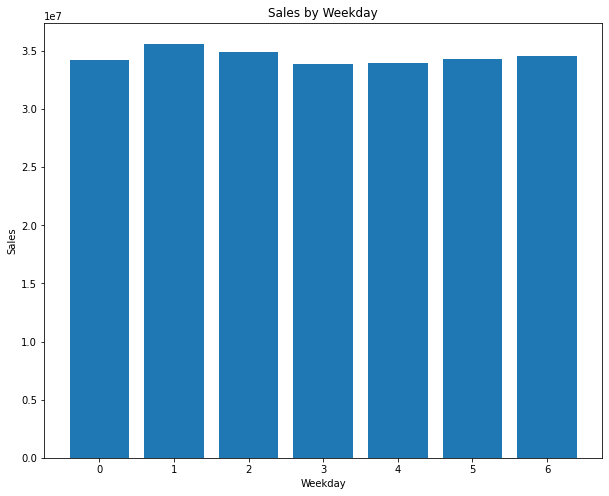

In [28]:
plt.figure(figsize=(10,8))
plt.bar(sales_day.index, sales_day['Sales'])
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.show()

## 4) What city sold the most product?

### Add city column

In [29]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek,City
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,Dallas (TX)
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6,Boston (MA)
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,Los Angeles (CA)
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,Los Angeles (CA)
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1,Los Angeles (CA)


In [30]:
max_sales_city = df.groupby(['City']).sum()
max_sales_city

,Unnamed: 0.1,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,DayofWeek
City,,,,,,,
Atlanta (GA),68115005476,5.016567e+10,116214,19459357.40,733558,19568490.06,312837
Austin (TX),45336057067,3.338994e+10,78071,12669115.27,488803,12737072.25,206416
Boston (MA),91332890173,6.727709e+10,157696,25461868.39,987784,25631494.07,415821
Dallas (TX),67924464713,5.003793e+10,117110,19268394.74,732340,19375827.80,310576
Los Angeles (CA),135545275985,9.983433e+10,233023,37950046.61,1458275,38167995.60,616980
New York City (NY),113813888279,8.381896e+10,195524,32447595.81,1230187,32650222.01,522382
Portland (ME),11223022797,8.264225e+09,19250,3130324.75,120008,3148307.89,50715
Portland (OR),45826135523,3.375184e+10,79121,13023907.54,494347,13095126.38,208117
San Francisco (CA),204671939542,1.507311e+11,351673,57480232.18,2208640,57835427.37,939078


In [31]:
max_sales_city.to_csv('../results/max_sales_city.csv', encoding='utf-8')

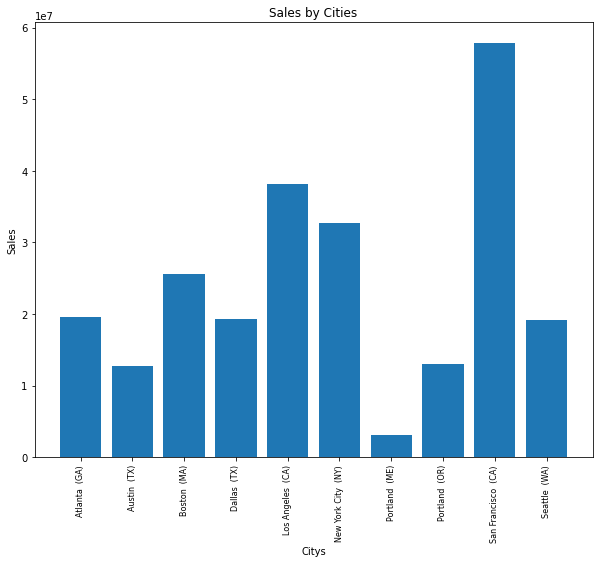

In [32]:
plt.figure(figsize=(10,8))
plt.bar(max_sales_city.index, max_sales_city['Sales'])
plt.title('Sales by Cities')
plt.xlabel('Citys')
plt.ylabel('Sales')
plt.xticks(rotation='vertical', size=8)
plt.show()

## 5) Sales By Hour?

### Add hour column

In [33]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek,City,Hour
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,Dallas (TX),8
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6,Boston (MA),22
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,Los Angeles (CA),14
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,Los Angeles (CA),14
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1,Los Angeles (CA),9


In [35]:
max_sales_hour = df.groupby(['Hour']).sum()
max_sales_hour

,Unnamed: 0.1,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,DayofWeek
Hour,,,,,,,
0,17926921838,1.320684e+10,30996,4965076.90,192878,4996048.89,81718
1,10772009304,7.935908e+09,18333,3209430.00,116599,3226068.16,49714
2,5681648392,4.183387e+09,9786,1636835.48,59549,1643960.08,25760
3,3801037002,2.799112e+09,6496,1013084.94,41328,1020305.23,16730
4,3901198756,2.872472e+09,6559,1134407.26,43036,1138627.07,18123
5,6020180712,4.430837e+09,10451,1607348.47,65107,1614758.74,27265
6,11350118486,8.358254e+09,19670,3115000.77,122773,3136791.00,51639
7,18322286311,1.349014e+10,31892,5183976.77,201950,5213978.84,82985
8,28583723910,2.104577e+10,49014,8301794.34,305382,8346442.79,129780


In [36]:
max_sales_hour.to_csv('../results/max_sales_hour.csv', encoding='utf-8')

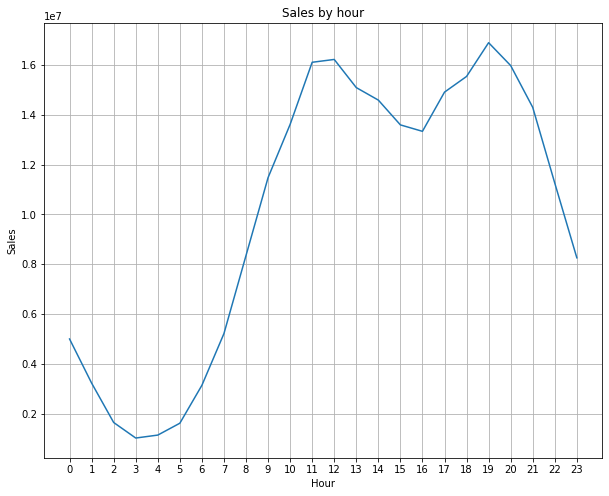

In [37]:
plt.figure(figsize=(10,8))
plt.plot(max_sales_hour.index, max_sales_hour['Sales'])
plt.title('Sales by hour')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.xticks(max_sales_hour.index)
plt.grid()
plt.show()

## 6) What products sold the most?

In [38]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek,City,Hour
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,Dallas (TX),8
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6,Boston (MA),22
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,Los Angeles (CA),14
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,Los Angeles (CA),14
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1,Los Angeles (CA),9


In [39]:
most_sold = df.groupby(['Product']).sum()
most_sold

,Unnamed: 0.1,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,DayofWeek,Hour
Product,,,,,,,,
20in Monitor,18786899327,1.383850e+10,28903,3157482.93,205352,3179040.97,85596,411348
27in 4K Gaming Monitor,28526270633,2.101139e+10,43708,17007463.90,311080,17045682.92,129864,636412
27in FHD Monitor,34381023579,2.532420e+10,52850,7881824.51,367906,7926971.50,158725,752780
34in Ultrawide Monitor,28249252052,2.080020e+10,43393,16441027.33,303128,16488906.07,130333,623532
AA Batteries (4-pack),94215769872,6.939292e+10,193445,553109.76,1018906,742828.80,430276,2088394
AAA Batteries (4-pack),94498921482,6.960010e+10,217119,432016.13,1024590,649185.81,428540,2081324
Apple Airpods Headphones,71188132827,5.243229e+10,109627,16326450.00,766339,16444050.00,325248,1563128
Bose SoundSport Headphones,61007367512,4.493458e+10,94199,9326567.25,658791,9418958.01,283192,1347115
Flatscreen TV,21947835658,1.616167e+10,33733,10080000.00,239568,10119900.00,100100,481705


In [40]:
most_sold.to_csv('../results/most_sold.csv', encoding='utf-8')

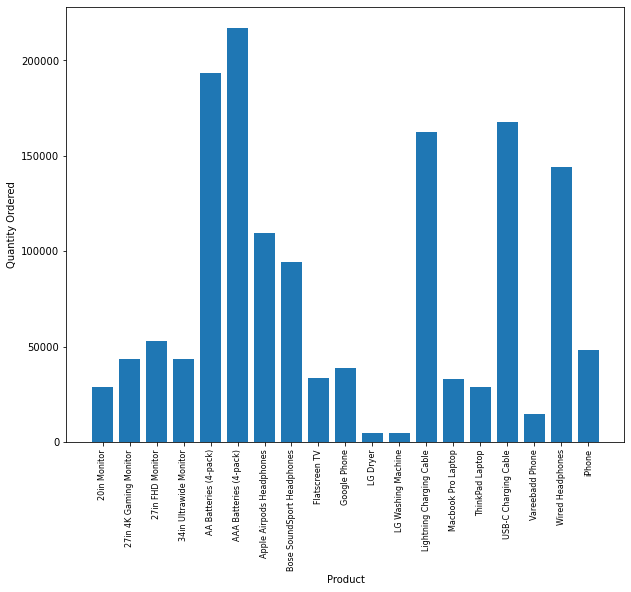

In [41]:
plt.figure(figsize=(10,8))
plt.bar(most_sold.index, most_sold['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical', size=8)
plt.show()

## 7) What products are most often sold together?

In [42]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek,City,Hour
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,Dallas (TX),8
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6,Boston (MA),22
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,Los Angeles (CA),14
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,Los Angeles (CA),14
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1,Los Angeles (CA),9


In [43]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
same_order_id = df[df['Order ID'].duplicated(keep=False)]
same_order_id

,Unnamed: 0.1,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,DayofWeek,City,Hour
0,0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,4,Dallas (TX),8
2,2,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,6,Boston (MA),22
3,3,3.0,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,4,Los Angeles (CA),14
4,4,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,4,Los Angeles (CA),14
5,5,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,1,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307945,1307945,11681.0,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,1,Los Angeles (CA),20
1307946,1307946,11682.0,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,6,San Francisco (CA),16
1307947,1307947,11683.0,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,0,San Francisco (CA),7
1307948,1307948,11684.0,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,3,San Francisco (CA),17


In [44]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [45]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 462315
('Lightning Charging Cable', 'Lightning Charging Cable') 457464
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 435813
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 433832
('Wired Headphones', 'Wired Headphones') 398237
('Apple Airpods Headphones', 'Apple Airpods Headphones') 327705
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 281148
('27in FHD Monitor', '27in FHD Monitor') 158088
('iPhone', 'iPhone') 143780
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 131075
